In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5cdb90bc-44f3-4cb8-8400-f68100e2309f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-16T20:31:33.255Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8883}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now',utc='True')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951562e+07,1.951562e+07,False,NaN,1,NaN,NaN,None,2023-10-16T20:30:00.000Z,28612.203840,2.815790e+10,407.0036,0.037499,5.702551,3.694128,7.811322,2.950696,-3.762971,5.583850e+11,50.9206,6.008563e+11,None,2023-10-16T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:31:33.630709+00:00
1,1027,Ethereum,ETH,ethereum,7557,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202598e+08,1.202598e+08,True,NaN,2,NaN,NaN,None,2023-10-16T20:30:00.000Z,1593.970342,8.682990e+09,245.0504,-0.136985,2.078318,0.921055,-2.490450,-7.977918,-15.799860,1.916905e+11,17.4801,1.916905e+11,None,2023-10-16T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:31:33.630709+00:00
2,825,Tether USDt,USDT,tether,63760,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.353101e+10,8.662567e+10,True,NaN,3,NaN,NaN,None,2023-10-16T20:30:00.000Z,1.000486,4.584943e+10,318.0902,-0.018567,0.039485,0.041493,0.014218,0.165288,0.035645,8.357159e+10,7.6214,8.666775e+10,None,2023-10-16T20:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-16 20:31:33.630709+00:00
3,1839,BNB,BNB,bnb,1684,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517058e+08,1.517058e+08,False,NaN,4,NaN,NaN,None,2023-10-16T20:30:00.000Z,215.019070,5.223261e+08,53.1766,0.058876,2.611490,4.382199,0.149331,-4.764124,-10.346027,3.261964e+10,2.9746,3.261964e+10,None,2023-10-16T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:31:33.630709+00:00
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-16T20:30:00.000Z,0.497751,1.057223e+09,191.7105,0.001486,1.980825,-0.886258,-0.548405,-13.276651,-34.732540,2.660031e+10,2.4257,4.977507e+10,None,2023-10-16T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:31:33.630709+00:00
5,3408,USDC,USDC,usd-coin,14480,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.522056e+10,2.522056e+10,False,NaN,6,NaN,NaN,None,2023-10-16T20:30:00.000Z,1.000189,4.594828e+09,319.6970,-0.005091,0.007340,0.034642,0.011997,0.007346,0.016598,2.522534e+10,2.3005,2.522534e+10,None,2023-10-16T20:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-16 20:31:33.630709+00:00
6,5426,Solana,SOL,solana,536,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.163028e+08,5.600320e+08,True,NaN,7,NaN,NaN,None,2023-10-16T20:30:00.000Z,24.117780,6.965877e+08,331.6870,0.889395,10.221989,8.794243,26.520493,4.942860,-4.769185,1.004030e+10,0.9156,1.350673e+10,None,2023-10-16T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:31:33.630709+00:00
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521593e+10,3.625937e+10,False,NaN,8,NaN,NaN,None,2023-10-16T20:30:00.000Z,0.251910,1.846699e+08,144.7819,-0.325365,1.997666,-0.308282,1.063730,-7.572634,-16.908938,8.871254e+09,0.8090,1.133596e+10,None,2023-10-16T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:31:33.630709+00:00
8,74,Dogecoin,DOGE,dogecoin,808,2013-12-15T00:00:00.000Z,"[mineable, pow

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5cdb90bc-44f3-4cb8-8400-f68100e2309f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Using this to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 

    
    if not os.path.isfile(r'/Users/ashishtammana/untitled folder/API.csv'):
        df.to_csv(r'/Users/ashishtammana/untitled folder/API.csv',header = 'Column_names')
    else:
         df.to_csv(r'/Users/ashishtammana/untitled folder/API.csv',mode='a', header = False)
  

In [6]:
import os
from time import time
from time import sleep 


for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)#sleep in one minute
exit()

/var/folders/bw/mxp77vqn7276f0tjxhvsc8cr0000gn/T/ipykernel_46704/1990983639.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


/var/folders/bw/mxp77vqn7276f0tjxhvsc8cr0000gn/T/ipykernel_46704/1990983639.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


/var/folders/bw/mxp77vqn7276f0tjxhvsc8cr0000gn/T/ipykernel_46704/1990983639.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


/var/folders/bw/mxp77vqn7276f0tjxhvsc8cr0000gn/T/ipykernel_46704/1990983639.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


/var/folders/bw/mxp77vqn7276f0tjxhvsc8cr0000gn/T/ipykernel_46704/1990983639.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [7]:
df72=pd.read_csv(r'/Users/ashishtammana/untitled folder/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.951556e+07,1.951556e+07,False,NaN,1,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,28333.644503,2.654262e+10,399.5456,0.576065,4.817568,2.400754,6.589077,1.565545,-5.229465,5.529468e+11,50.7796,5.950065e+11,NaN,2023-10-16T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 18:38:32.098119
1,1,1027,Ethereum,ETH,ethereum,7557,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202598e+08,1.202598e+08,True,NaN,2,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,1583.012890,8.304408e+09,249.6744,0.335350,1.297091,0.076849,-3.326522,-8.807963,-16.764910,1.903728e+11,17.4776,1.903728e+11,NaN,2023-10-16T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 18:38:32.098119
2,2,825,Tether USDt,USDT,tether,63758,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.353101e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,1.000490,4.342935e+10,307.3292,0.004257,0.053194,0.040745,0.013569,0.135055,0.040649,8.357190e+10,7.6743,8.666807e+10,NaN,2023-10-16T18:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-16 18:38:32.098119
3,3,1839,BNB,BNB,bnb,1684,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517058e+08,1.517058e+08,False,NaN,4,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,213.825460,5.016176e+08,48.2698,0.335488,1.884477,3.207386,-0.426935,-5.443653,-11.055663,3.243856e+10,2.9781,3.243856e+10,NaN,2023-10-16T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 18:38:32.098119
4,4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,0.495010,1.033892e+09,183.5658,0.526748,1.201501,-1.337724,-1.253340,-14.351692,-35.087925,2.645382e+10,2.4287,4.950096e+10,NaN,2023-10-16T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 18:38:32.098119
5,5,3408,USDC,USDC,usd-coin,14479,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.520397e+10,2.520397e+10,False,NaN,6,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,1.000210,4.284107e+09,306.9292,0.001743,0.023964,0.041308,-0.007809,-0.004420,0.019043,2.520926e+10,2.3149,2.520926e+10,NaN,2023-10-16T18:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-16 18:38:32.098119
6,6,5426,Solana,SOL,solana,536,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.163029e+08,5.600321e+08,True,NaN,7,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,23.609642,6.351024e+08,303.5283,0.847630,7.927949,5.645717,23.943875,1.625939,-7.872358,9.828763e+09,0.9026,1.322216e+10,NaN,2023-10-16T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 18:38:32.098119
7,7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.521562e+10,3.625937e+10,False,NaN,8,NaN,NaN,NaN,2023-10-16T18:36:00.000Z,0.251638,1.770331e+08,141.5008,0.329649,1.871983,-0.736678,0.724121,-7.620678,-17.945182,8.861587e+09,0.8137,1.132371e+10,NaN,2023-10-16T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 18:38:32.098119
8,8,74,Dogecoin,DOGE,dogecoin,808,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",

In [8]:
 pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19515625.00000,19515625.00000,False,NaN,1,NaN,NaN,None,2023-10-16T20:33:00.000Z,28560.70785,28216793855.34071,406.61920,-0.16861,5.40680,3.53065,7.58757,2.70563,-3.88648,557380064178.04688,50.82890,599774864896.15002,None,2023-10-16T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:35:34.712631
1,1027,Ethereum,ETH,ethereum,7557,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120259759.97921,120259759.97921,True,NaN,2,NaN,NaN,None,2023-10-16T20:33:00.000Z,1592.14902,8690873718.68140,244.93830,-0.20064,1.92801,0.82165,-2.62899,-8.12348,-15.82592,191471459096.27271,17.46940,191471459096.26999,None,2023-10-16T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:35:34.712631
2,825,Tether USDt,USDT,tether,63760,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83531007239.14531,86625667477.81340,True,NaN,3,NaN,NaN,None,2023-10-16T20:33:00.000Z,1.00049,35506684885.14777,223.30110,-0.02059,0.03491,0.04243,0.02103,0.17760,0.04024,83571578653.77202,7.62140,86667741983.89999,None,2023-10-16T20:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-16 20:35:34.712631
3,1839,BNB,BNB,bnb,1684,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151705799.25469,151705799.25469,False,NaN,4,NaN,NaN,None,2023-10-16T20:33:00.000Z,214.90756,522375876.97654,52.90300,-0.00670,2.51743,4.38040,0.09381,-4.79285,-10.34269,32602723456.91333,2.97460,32602723456.91000,None,2023-10-16T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:35:34.712631
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-16T20:33:00.000Z,0.49770,1057544425.91161,191.35030,-0.02942,1.91404,-0.86587,-0.56780,-13.23864,-34.61963,26597656926.56050,2.42670,49770107777.76000,None,2023-10-16T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:35:34.712631
5,3408,USDC,USDC,usd-coin,14480,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25220559021.97958,25220559021.97958,False,NaN,6,NaN,NaN,None,2023-10-16T20:33:00.000Z,1.00013,4615500154.18767,320.95300,-0.02060,-0.00230,0.02042,0.00357,0.01293,0.01223,25223907090.19225,2.30030,25223907090.19000,None,2023-10-16T20:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-16 20:35:34.712631
6,5426,Solana,SOL,solana,536,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416302843.12824,560032033.55625,True,NaN,7,NaN,NaN,None,2023-10-16T20:33:00.000Z,24.11301,697678096.23306,331.50270,0.92273,10.12604,8.91591,26.46189,4.98257,-4.67182,10038314558.36057,0.91550,13504057943.38000,None,2023-10-16T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-16 20:35:34.712631
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35215930361.37000,36259372926.66300,False,NaN,8,NaN,NaN,None,2023-10-16T20:33:00.000Z,0.25191,184720189.36553,144.29750,-0.30973,1.91688,-0.24174,1.04751,-7.60256,-16.86600,8871163267.32282,0.80900,11335845537.32000,None,2023-10-16T20:33:00.000Z,NaN,Na

In [10]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h' , 'quote.USD.volume_24h' ,'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d' , 'quote.USD.percent_change_60d' , 'quote.USD.percent_change_90d' ]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.volume_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.16861,28216793855.34071,3.53065,7.58757,2.70563,-3.88648
Ethereum,-0.20064,8690873718.68140,0.82165,-2.62899,-8.12348,-15.82592
Tether USDt,-0.02059,35506684885.14777,0.04243,0.02103,0.17760,0.04024
BNB,-0.00670,522375876.97654,4.38040,0.09381,-4.79285,-10.34269
XRP,-0.02942,1057544425.91161,-0.86587,-0.56780,-13.23864,-34.61963
USDC,-0.02060,4615500154.18767,0.02042,0.00357,0.01293,0.01223
Solana,0.92273,697678096.23306,8.91591,26.46189,4.98257,-4.67182
Cardano,-0.30973,184720189.36553,-0.24174,1.04751,-7.60256,-16.86600
Dogecoin,-0.08572,253924337.97163,2.03922,-3.12776,-8.67311,-11.60037


In [11]:
#Stacking Crypto Currency Names By grouping them with mean
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h             -0.16861
             quote.USD.volume_24h           28216793855.34071
             quote.USD.percent_change_7d              3.53065
             quote.USD.percent_change_30d             7.58757
             quote.USD.percent_change_60d             2.70563
             quote.USD.percent_change_90d            -3.88648
Ethereum     quote.USD.percent_change_1h             -0.20064
             quote.USD.volume_24h            8690873718.68140
             quote.USD.percent_change_7d              0.82165
             quote.USD.percent_change_30d            -2.62899
             quote.USD.percent_change_60d            -8.12348
             quote.USD.percent_change_90d           -15.82592
Tether USDt  quote.USD.percent_change_1h             -0.02059
             quote.USD.volume_24h           35506684885.14777
             quote.USD.percent_change_7d              0.04243
             quote.USD.perce

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
#creating a Data Frame after Stacking Crypto Currency Names By grouping them with mean
df5 = df4.to_frame(name='values')
df5

values
name                                                      
Bitcoin     quote.USD.percent_change_1h           -0.16861
            quote.USD.volume_24h         28216793855.34071
            quote.USD.percent_change_7d            3.53065
            quote.USD.percent_change_30d           7.58757
            quote.USD.percent_change_60d           2.70563
            quote.USD.percent_change_90d          -3.88648
Ethereum    quote.USD.percent_change_1h           -0.20064
            quote.USD.volume_24h          8690873718.68140
            quote.USD.percent_change_7d            0.82165
            quote.USD.percent_change_30d          -2.62899
            quote.USD.percent_change_60d          -8.12348
            quote.USD.percent_change_90d         -15.82592
Tether USDt quote.USD.percent_change_1h           -0.02059
            quote.USD.volume_24h         35506684885.14777
            quote.USD.percent_change_7d            0.04243
            quote.USD.percent_change_30d           0.02103
            quote.USD.percent_change_60d           0.17760
            quote.USD.percent_change_90d           0.04024
BNB         quote.USD.percent_change_1h           -0.00670
            quote.USD.volume_24h           522375876.97654
            quote.USD.percent_change_7d            4.38040
            quote.USD.percent_change_30d           0.09381
            quote.USD.percent_change_60d          -4.79285
            quote.USD.percent_change_90d         -10.34269
XRP         quote.USD.percent_change_1h           -0.02942
            quote.USD.volume_24h          1057544425.91161
            quote.USD.percent_change_7d           -0.86587
            quote.USD.percent_change_30d          -0.56780
            quote.USD.percent_change_60d         -13.23864
            quote.USD.percent_change_90d         -34.61963
USDC        quote.USD.percent_change_1h           -0.02060
            quote.USD.volume_24h          4615500154.18767
            quote.USD.percent_change_7d            0.02042
            quote.USD.percent_change_30d           0.00357
            quote.USD.percent_change_60d           0.01293
            quote.USD.percent_change_90d           0.01223
Solana      quote.USD.percent_change_1h            0.92273
            quote.USD.volume_24h           697678096.23306
            quote.USD.percent_change_7d            8.91591
            quote.USD.percent_change_30d          26.46189
            quote.USD.percent_change_60d           4.98257
            quote.USD.percent_change_90d          -4.67182
Cardano     quote.USD.percent_change_1h           -0.30973
            quote.USD.volume_24h           184720189.36553
            quote.USD.percent_change_7d           -0.24174
            quote.USD.percent_change_30d           1.04751
            quote.USD.percent_change_60d          -7.60256
            quote.USD.percent_change_90d         -16.86600
Dogecoin    quote.USD.percent_change_1h           -0.08572
            quote.USD.volume_24h           253924337.97163
            quote.USD.percent_change_7d            2.03922
            quote.USD.percent_change_30d          -3.12776
            quote.USD.percent_change_60d          -8.67311
            quote.USD.percent_change_90d         -11.60037
TRON        quote.USD.percent_change_1h           -0.08080
            quote.USD.volume_24h           239515448.64464
            quote.USD.percent_change_7d            2.77300
            quote.USD.percent_change_30d           6.38696
            quote.USD.percent_change_60d          18.41073
            quote.USD.percent_change_90d          11.65401
Toncoin     quote.USD.percent_change_1h            0.26281
            quote.USD.volume_24h            13236872.41728
            quote.USD.percent_change_7d           -0.92812
            quote.USD.percent_change_30d         -19.13198
            quote.USD.percent_change_60d          41.41763
            quote.USD.percent_change_90d          39.50380
Dai         quote.USD.percent_change_1h 

In [14]:
type(df5)

pandas.core.frame.DataFrame

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
#Creating an Index for the Data Frame
index = pd.Index(range(90))
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16861
1,Bitcoin,quote.USD.volume_24h,28216793855.34071
2,Bitcoin,quote.USD.percent_change_7d,3.53065
3,Bitcoin,quote.USD.percent_change_30d,7.58757
4,Bitcoin,quote.USD.percent_change_60d,2.70563
5,Bitcoin,quote.USD.percent_change_90d,-3.88648
6,Ethereum,quote.USD.percent_change_1h,-0.20064
7,Ethereum,quote.USD.volume_24h,8690873718.68140
8,Ethereum,quote.USD.percent_change_7d,0.82165
9,Ethereum,quote.USD.percent_change_30d,-2.62899


In [17]:
df7 = df6.rename(columns={'level_1': "Percent_Change" , 'name': 'Name' , 'values': 'Values'})
df7

,Name,Percent_Change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.16861
1,Bitcoin,quote.USD.volume_24h,28216793855.34071
2,Bitcoin,quote.USD.percent_change_7d,3.53065
3,Bitcoin,quote.USD.percent_change_30d,7.58757
4,Bitcoin,quote.USD.percent_change_60d,2.70563
5,Bitcoin,quote.USD.percent_change_90d,-3.88648
6,Ethereum,quote.USD.percent_change_1h,-0.20064
7,Ethereum,quote.USD.volume_24h,8690873718.68140
8,Ethereum,quote.USD.percent_change_7d,0.82165
9,Ethereum,quote.USD.percent_change_30d,-2.62899


In [18]:
#Changing Column Names of Percent_Change into a Simpler Form
df7['Percent_Change'] = df7['Percent_Change'].replace(['quote.USD.percent_change_1h','quote.USD.volume_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,Name,Percent_Change,Values
0,Bitcoin,1h,-0.16861
1,Bitcoin,24h,28216793855.34071
2,Bitcoin,7d,3.53065
3,Bitcoin,30d,7.58757
4,Bitcoin,60d,2.70563
5,Bitcoin,90d,-3.88648
6,Ethereum,1h,-0.20064
7,Ethereum,24h,8690873718.68140
8,Ethereum,7d,0.82165
9,Ethereum,30d,-2.62899


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

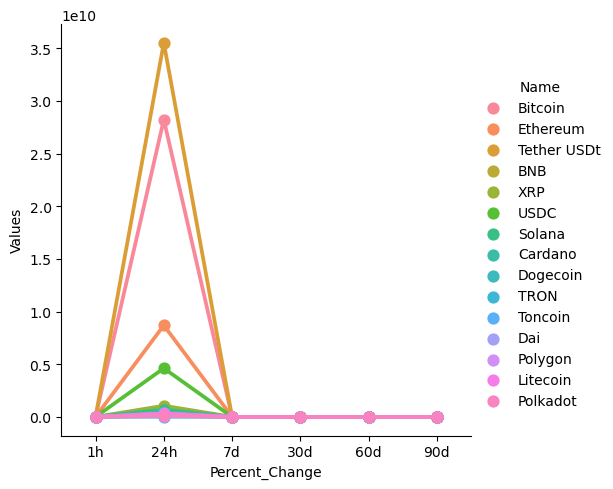

In [20]:
sns.catplot(x='Percent_Change', y = 'Values' , hue = 'Name', data=df7, kind = 'point')

In [21]:
df9 =df[['name' , 'quote.USD.price', 'Timestamp']]
df9.query("name == 'Polkadot'")
df9

,name,quote.USD.price,Timestamp
0,Bitcoin,28560.70785,2023-10-16 20:35:34.712631
1,Ethereum,1592.14902,2023-10-16 20:35:34.712631
2,Tether USDt,1.00049,2023-10-16 20:35:34.712631
3,BNB,214.90756,2023-10-16 20:35:34.712631
4,XRP,0.49770,2023-10-16 20:35:34.712631
5,USDC,1.00013,2023-10-16 20:35:34.712631
6,Solana,24.11301,2023-10-16 20:35:34.712631
7,Cardano,0.25191,2023-10-16 20:35:34.712631
8,Dogecoin,0.06013,2023-10-16 20:35:34.712631
9,TRON,0.08882,2023-10-16 20:35:34.712631


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

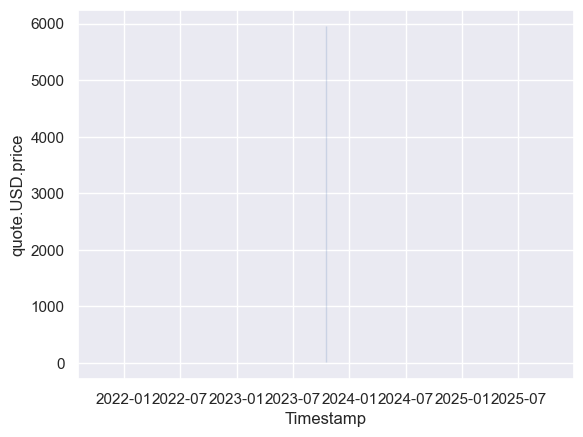

In [23]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='Timestamp' , y='quote.USD.price', data = df9)